# Importing Libraries

In [58]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
dataset = pd.read_csv('E:\\csv files\\HousingData.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
dataset_column_name = dataset.columns
dataset_column_name

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


-----> Our dpendent feature is MEDV.

-----> We need to know the relationship between dependent feature and independent features.


-----> we analyze these things through plot(pairplot)

-----> correlation should be analyzed.

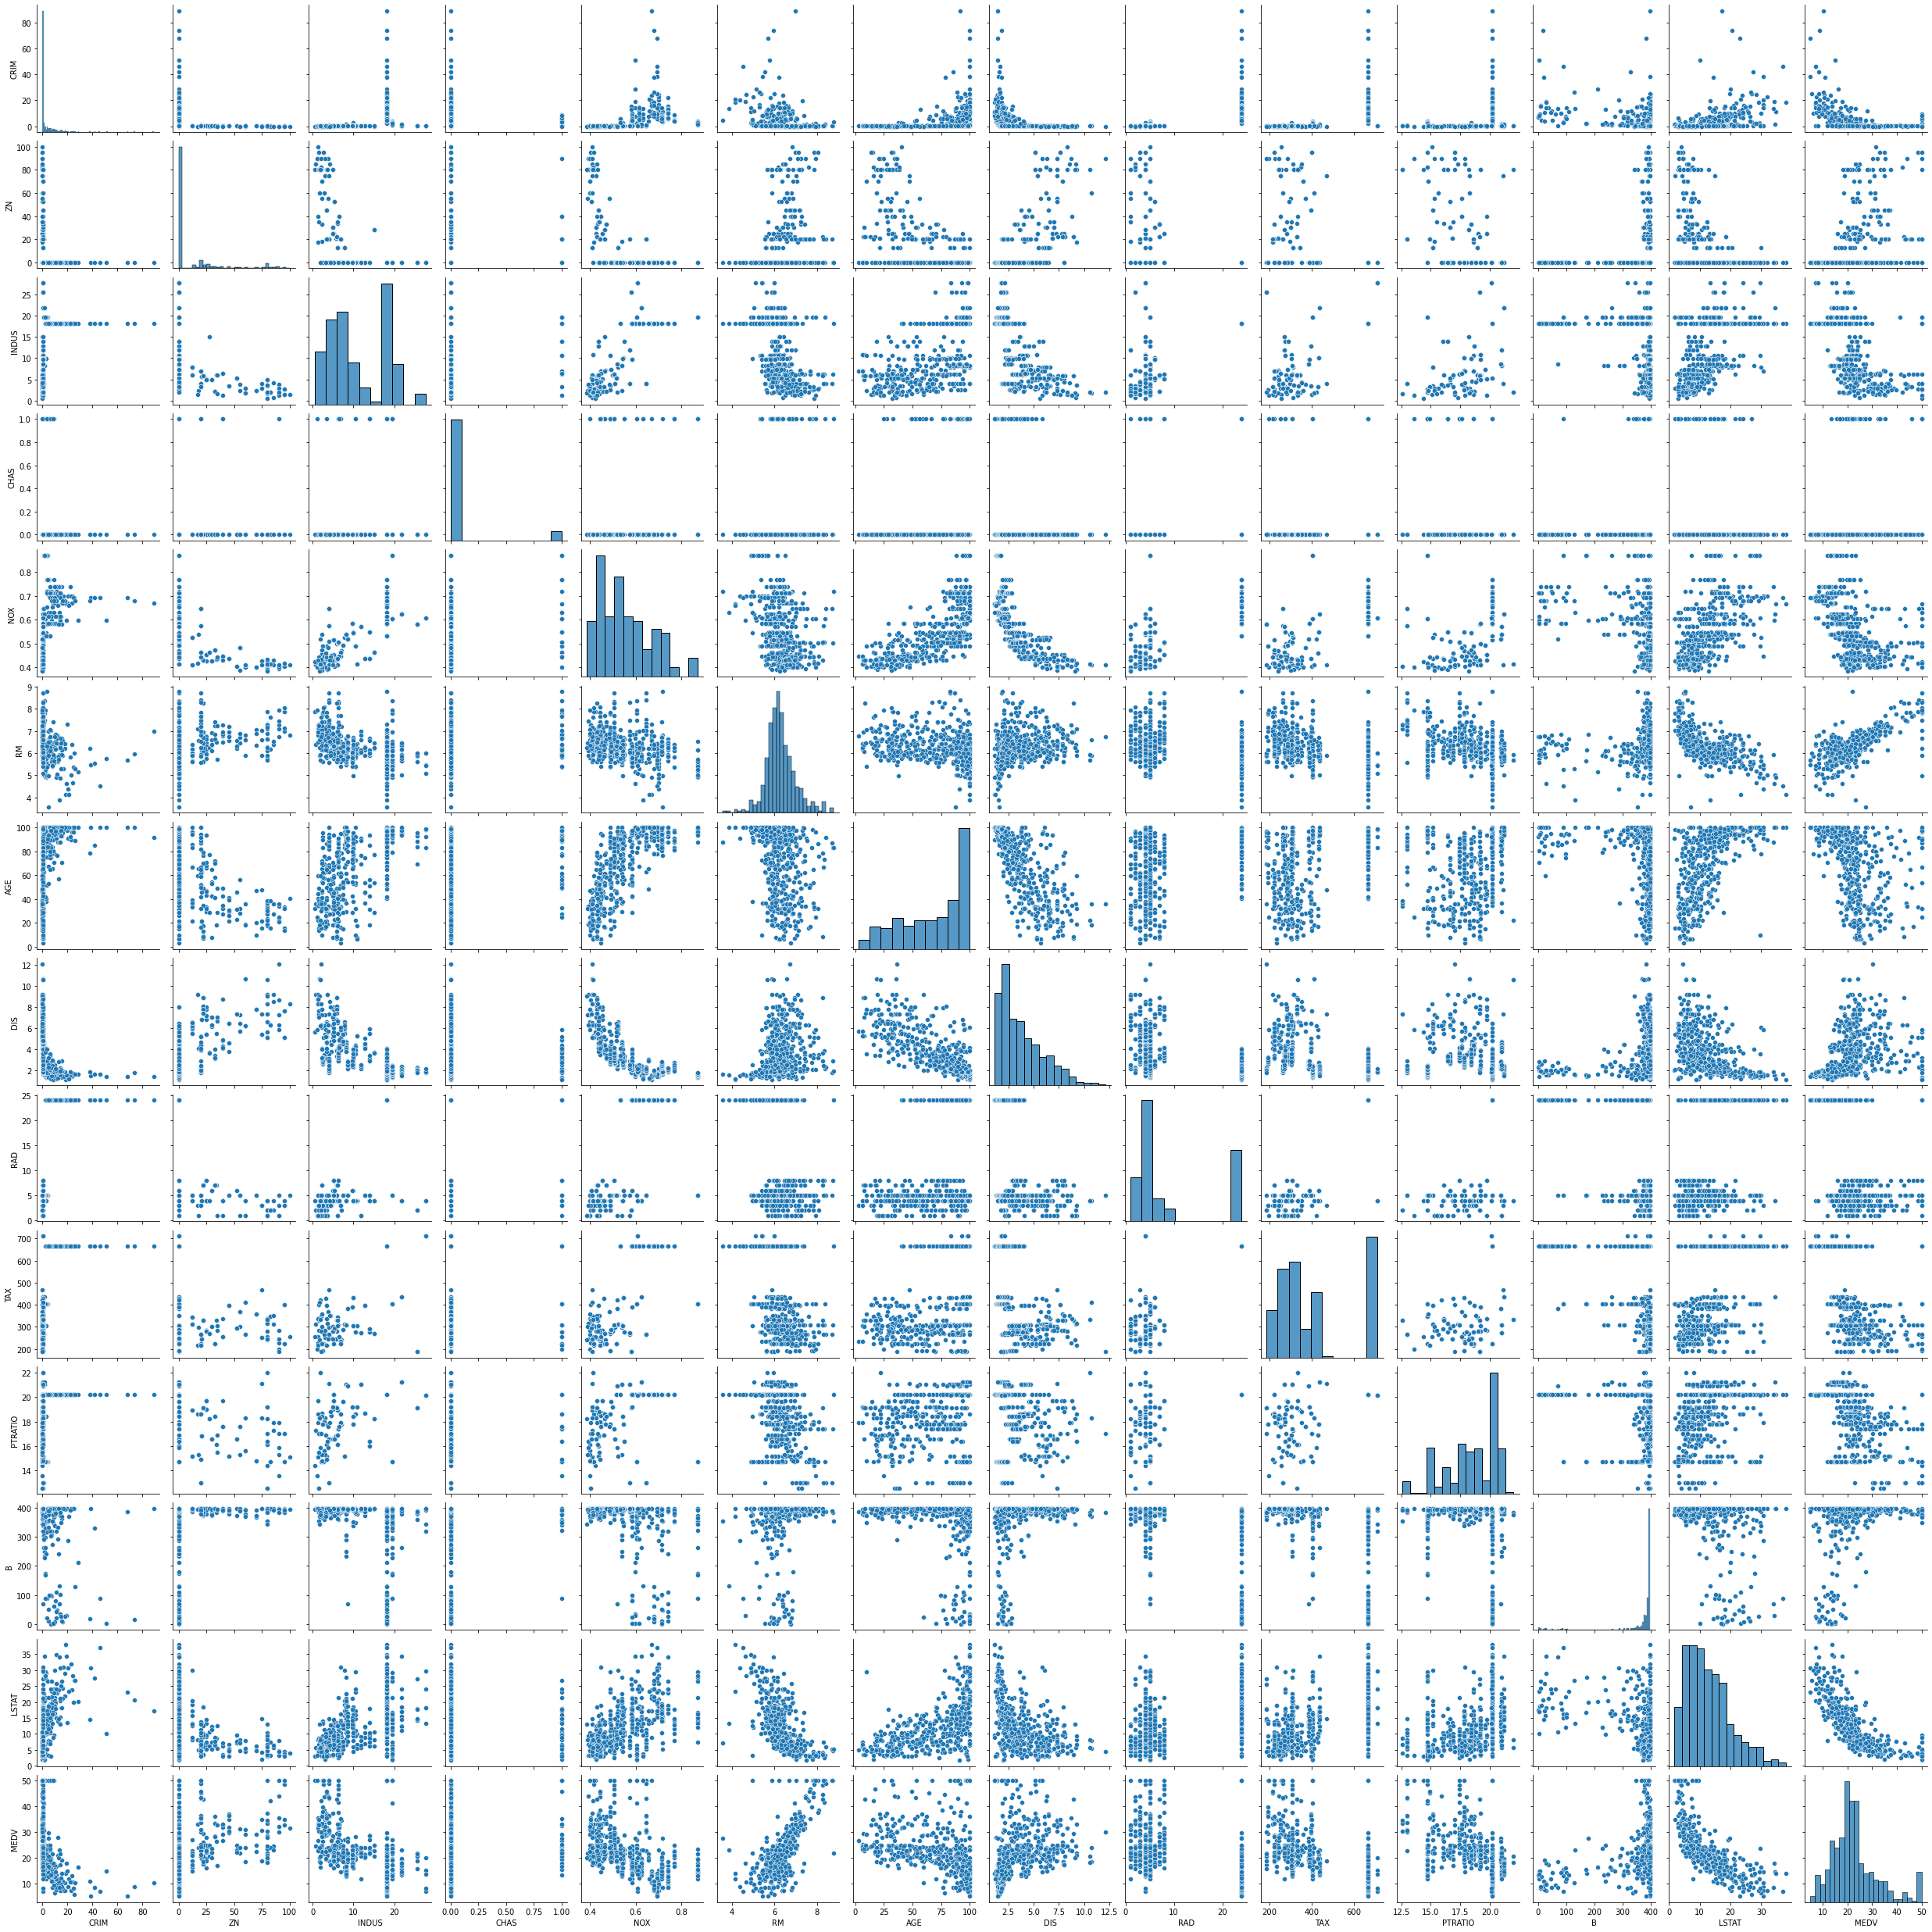

In [5]:
sns.pairplot(dataset)

:correlation:

<AxesSubplot:>

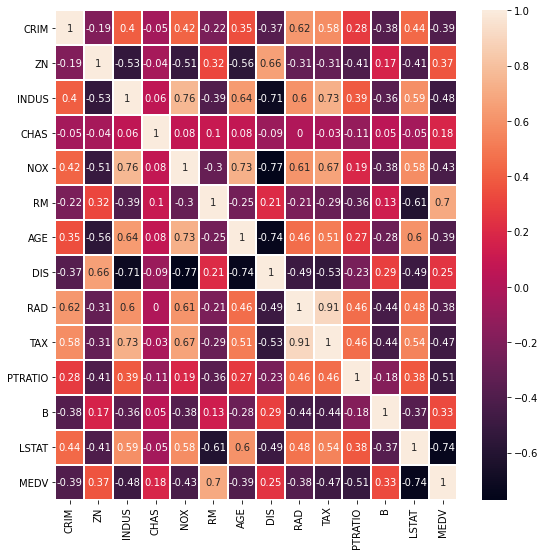

In [6]:
correlation_metrix = dataset.corr().round(2)
plt.figure(figsize=(9,9))
sns.heatmap(correlation_metrix, annot = True, linewidths=1, linecolor='white', center=None)

 Correlation -->
 
 
 MEDV is highly correlated with LSTAT and RM
 
 
DIS and INDUS 


DIand NOX


DIS and AGE


TAX and RAD

Text(0, 0.5, 'MEDV')

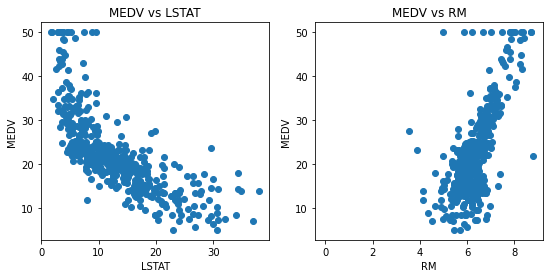

In [7]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)


x  = dataset['LSTAT']
y = dataset['MEDV']
plt.scatter(x, y, marker='o')
plt.title('MEDV vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')


plt.subplot(1,2,2)
x  = dataset['RM']
y = dataset['MEDV']
plt.plot(11)
plt.scatter(x, y, marker='o')
plt.title('MEDV vs RM')
plt.xlabel('RM')
plt.ylabel('MEDV')

Text(0.5, 1.0, 'TAX VS RAD')

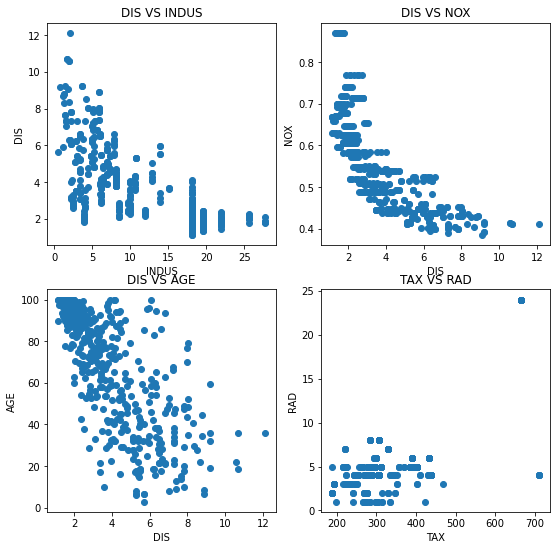

In [8]:
plt.figure(figsize= (9,9))


plt.subplot(2,2,1)
x = dataset['INDUS']
y = dataset['DIS']
plt.scatter(x,y)
plt.xlabel('INDUS')
plt.ylabel('DIS')
plt.title('DIS VS INDUS')


plt.subplot(2,2,2)
x = dataset['DIS']
y = dataset['NOX']
plt.scatter(x,y)
plt.xlabel('DIS')
plt.ylabel('NOX')
plt.title('DIS VS NOX')

plt.subplot(2,2,3)
x = dataset['DIS']
y = dataset['AGE']
plt.scatter(x,y)
plt.xlabel('DIS')
plt.ylabel('AGE')
plt.title('DIS VS AGE')

plt.subplot(2,2,4)
x = dataset['TAX']
y = dataset['RAD']
plt.scatter(x,y)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX VS RAD')




#    Drop those columns which are not very much correlated

In [30]:
house_dataset = dataset.drop(['ZN', 'DIS', 'CRIM', 'CHAS', 'AGE','RAD', 'B'], axis =1)
house_dataset.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296,15.3,4.98,24.0
1,7.07,0.469,6.421,242,17.8,9.14,21.6
2,7.07,0.469,7.185,242,17.8,4.03,34.7
3,2.18,0.458,6.998,222,18.7,2.94,33.4
4,2.18,0.458,7.147,222,18.7,NaN,36.2


In [31]:
house_dataset.isnull().sum()

INDUS      20
NOX         0
RM          0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

# Handling missing value : using simple mean, mode, and median

I used median in this case because of the outliers

In [33]:
house_dataset.fillna(house_dataset.median(), inplace=True)

In [34]:
house_dataset.isnull().sum()

INDUS      0
NOX        0
RM         0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

# Outlier Checking 

C:\Users\97798\anaconda\envs\Deep Learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='INDUS'>

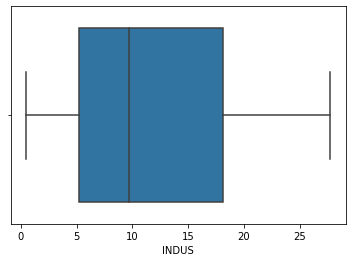

In [63]:
#sample ---- we should check for all features
sns.boxplot(house_dataset['INDUS'])

In [36]:
house_dataset.head(20)

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296,15.3,4.98,24.0
1,7.07,0.469,6.421,242,17.8,9.14,21.6
2,7.07,0.469,7.185,242,17.8,4.03,34.7
3,2.18,0.458,6.998,222,18.7,2.94,33.4
4,2.18,0.458,7.147,222,18.7,11.43,36.2
5,2.18,0.458,6.430,222,18.7,5.21,28.7
6,7.87,0.524,6.012,311,15.2,12.43,22.9
7,7.87,0.524,6.172,311,15.2,19.15,27.1
8,7.87,0.524,5.631,311,15.2,29.93,16.5
9,7.87,0.524,6.004,311,15.2,17.10,18.9


In [41]:
y = house_dataset['MEDV']
X = house_dataset.drop(['MEDV'], axis=1)
X.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296,15.3,4.98
1,7.07,0.469,6.421,242,17.8,9.14
2,7.07,0.469,7.185,242,17.8,4.03
3,2.18,0.458,6.998,222,18.7,2.94
4,2.18,0.458,7.147,222,18.7,11.43


In [40]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [42]:
X_train.shape

(404, 6)

In [44]:
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
X_train_poly.shape


(404, 28)

In [49]:
#These are the polynomial features 
pd.DataFrame(X_train_poly).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,6.91,0.448,6.169,233.0,17.9,5.81,47.7481,3.09568,42.62779,...,38.056561,1437.377,110.4251,35.84189,54289.0,4170.7,1353.73,320.41,103.999,33.7561
1,1.0,5.13,0.453,6.145,284.0,19.7,6.86,26.3169,2.32389,31.52385,...,37.761025,1745.180,121.0565,42.15470,80656.0,5594.8,1948.24,388.09,135.142,47.0596
2,1.0,18.10,0.700,5.277,666.0,20.2,30.81,327.6100,12.67000,95.51370,...,27.846729,3514.482,106.5954,162.58437,443556.0,13453.2,20519.46,408.04,622.362,949.2561
3,1.0,12.83,0.437,6.232,398.0,18.7,12.34,164.6089,5.60671,79.95656,...,38.837824,2480.336,116.5384,76.90288,158404.0,7442.6,4911.32,349.69,230.758,152.2756
4,1.0,18.10,0.584,5.565,666.0,20.2,17.16,327.6100,10.57040,100.72650,...,30.969225,3706.290,112.4130,95.49540,443556.0,13453.2,11428.56,408.04,346.632,294.4656


In [52]:
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [57]:
X_test_poly = poly_features.fit_transform(X_test)
y_pred_poly = linear_model.predict(X_test_poly)
y_pred_poly[:5], y_test[:5]

(array([29.2695813 , 28.38575757, 20.23682767, 20.30393595, 24.5552618 ]),
 307    28.2
 343    23.9
 47     16.6
 67     22.0
 362    20.8
 Name: MEDV, dtype: float64)

In [59]:
print('RMSE ::', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('R2 Score ::', r2_score(y_test,y_pred_poly))

RMSE :: 3.5362259836028223
R2 Score :: 0.8734673224221741


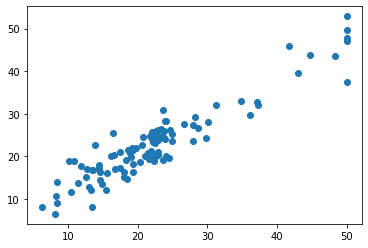

In [61]:
plt.scatter(y_test, y_pred_poly)
plt.show()

checking the output with linear regression model

In [65]:
linear_model1 = LinearRegression()
linear_model1.fit(X_train, y_train)
y_pred = linear_model1.predict(X_test)

In [66]:
print('RMSE ::', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score ::', r2_score(y_test,y_pred))

RMSE :: 5.5407957642348205
R2 Score :: 0.689353145246725


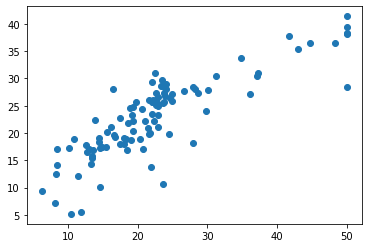

In [67]:
plt.scatter(y_test, y_pred)
plt.show()